In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.svm import SVR

In [182]:
df = pd.read_csv('AltCoinPricePrediction/Data/cryptocurrencypricehistory/coin_Cardano.csv')

In [183]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        1245 non-null   int64  
 1   Name       1245 non-null   object 
 2   Symbol     1245 non-null   object 
 3   Date       1245 non-null   object 
 4   High       1245 non-null   float64
 5   Low        1245 non-null   float64
 6   Open       1245 non-null   float64
 7   Close      1245 non-null   float64
 8   Volume     1245 non-null   float64
 9   Marketcap  1245 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 97.4+ KB


In [185]:
df = df.set_index(pd.DatetimeIndex(df['Date'])).drop('Date', axis=1).drop('SNo', axis=1)
df.head(10)

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,
2017-10-02 23:59:59,Cardano,ADA,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
2017-10-03 23:59:59,Cardano,ADA,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2017-10-04 23:59:59,Cardano,ADA,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
2017-10-05 23:59:59,Cardano,ADA,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
2017-10-06 23:59:59,Cardano,ADA,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08
2017-10-07 23:59:59,Cardano,ADA,0.021050,0.017620,0.018414,0.020941,7411240.0,5.429362e+08
2017-10-08 23:59:59,Cardano,ADA,0.023598,0.020147,0.020929,0.020477,7727460.0,5.309138e+08
2017-10-09 23:59:59,Cardano,ADA,0.022807,0.020342,0.020344,0.022114,4663310.0,5.733435e+08
2017-10-10 23:59:59,Cardano,ADA,0.022446,0.021279,0.022112,0.021531,2725600.0,5.582435e+08


<AxesSubplot:xlabel='Date'>

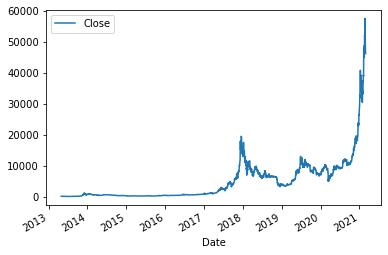

In [32]:
df.loc[:, ['Close']].plot()

<AxesSubplot:xlabel='Date'>

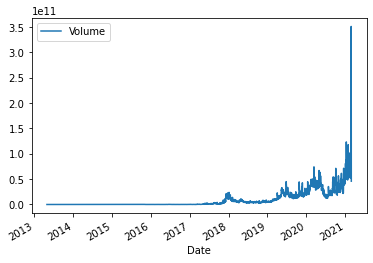

In [33]:
df.loc[:, ['Volume']].plot()

In [188]:
df.describe()

,High,Low,Open,Close,Volume,Marketcap
count,1245.000000,1245.000000,1245.000000,1245.000000,1.245000e+03,1.245000e+03
mean,0.146055,0.129342,0.137758,0.138757,4.729622e+08,3.788101e+09
std,0.190901,0.159500,0.174933,0.177812,1.427985e+09,5.099696e+09
min,0.021050,0.017620,0.018414,0.018539,1.739460e+06,4.806646e+08
25%,0.045570,0.042981,0.044286,0.044328,4.642072e+07,1.149308e+09
50%,0.083514,0.077631,0.080869,0.080952,1.011906e+08,2.102088e+09
75%,0.149314,0.138102,0.143086,0.143573,2.576860e+08,3.779666e+09
max,1.476653,1.234138,1.242145,1.324860,1.914198e+10,4.121970e+10


In [35]:
from sklearn.linear_model import LinearRegression

In [161]:
X = df.loc[:, ['Open', 'High', 'Low', 'Volume']].values
y = df.loc[:, 'Close'].values

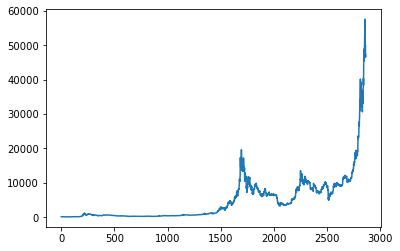

In [37]:
linreg = LinearRegression()
linreg.fit(X, y)
plt.plot(linreg.predict(X))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

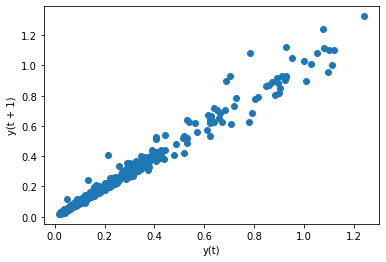

In [190]:
pd.plotting.lag_plot(df['Close'])

The closing prices appear to be highly correlated with each other.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

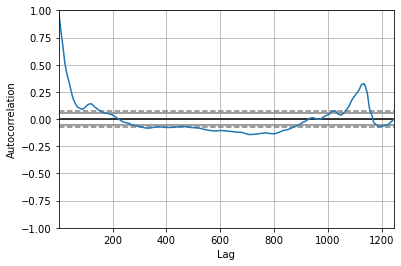

In [189]:
pd.plotting.autocorrelation_plot(df['Close'])